In [1]:
import mne
import os

In [11]:
subject = "fsaverage"
subjects_dir = os.path.join(os.path.dirname(__file__), "../..", "data", "datasets", "eeg_fsaverage")

trans = "fsaverage"

In [12]:
eeg_conductances = (0.3, 0.006, 0.3)
model = mne.make_bem_model(subject, ico=4, conductivity=eeg_conductances,
                                   subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    1.6 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    5.4 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Three-layer model surfaces loaded.
Computing the linear collocation s

In [14]:
src = mne.setup_source_space(subject, subjects_dir=subjects_dir, spacing="oct6",
                                add_dist="patch")

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/surf/lh.white...
Mapping lh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/163842 selected to source space (oct = 6)

Loading /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/surf/rh.white...
Mapping rh fsaverage -> oct (6) ...
    Triangle

Using surface: /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/bem/inner_skull.surf
Using surface: /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/bem/outer_skull.surf
Using surface: /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/bem/outer_skin.surf


/Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


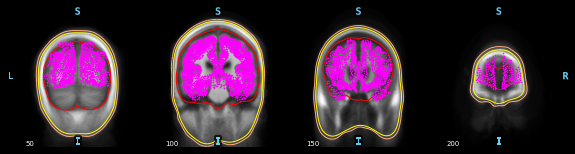

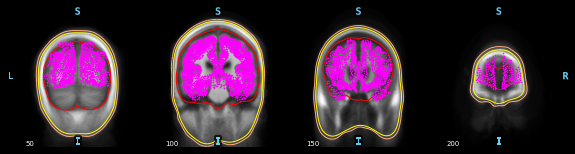

In [15]:
plot_bem_kwargs = dict(
    subject=subject, subjects_dir=subjects_dir,
    brain_surfaces='white', orientation='coronal',
    slices=[50, 100, 150, 200])
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

In [16]:
kind = "standard_1020"
montage = mne.channels.make_standard_montage(kind, head_size='auto')
info = mne.create_info(ch_names=montage.ch_names, sfreq=256, ch_types='eeg')
info.set_montage(montage)


fwd = mne.make_forward_solution(info, trans=trans, src=src, bem=bem,
                                    meg=False, eeg=True, mindist=0.0)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>] MRI (surface RAS) coords, subject 'fsaverage', ~31.2 MB>
MRI -> head transform : /Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  94 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instan

In [17]:
mne.write_forward_solution("fsaverage_surface_src-fwd", fwd)

    Write a source space...
    [done]
    Write a source space...


/var/folders/0l/jbpgzw1115n30m0dk2mmp60c0000gn/T/ipykernel_22070/859863330.py:1: RuntimeWarning: This filename (fsaverage_surface_src-fwd) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif or _fwd.fif.gz
  mne.write_forward_solution("fsaverage_surface_src-fwd", fwd)


    [done]
    2 source spaces written


In [18]:
fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                         use_cps=True)

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]


In [21]:
fwd_fixed["sol"]["data"].shape

(94, 8196)

In [24]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the three dipoles defined at each location in the source space
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans, fwd=fwd,
    surfaces='white', coord_frame='head', fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.1)

In [23]:
mne.write_forward_solution("fsaverage_surface_src_fixed_orientation-fwd.fif", fwd_fixed)

    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


/var/folders/0l/jbpgzw1115n30m0dk2mmp60c0000gn/T/ipykernel_22070/3673793734.py:1: RuntimeWarning: This filename (fsaverage_surface_src_fixed_orientation-fwd) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif or _fwd.fif.gz
  mne.write_forward_solution("fsaverage_surface_src_fixed_orientation-fwd", fwd_fixed)
/var/folders/0l/jbpgzw1115n30m0dk2mmp60c0000gn/T/ipykernel_22070/3673793734.py:1: RuntimeWarning: This forward solution is based on a forward solution with free orientation. The original forward solution is stored on disk in X/Y/Z RAS coordinates. Any transformation (surface orientation or fixed orientation) will be reverted. To reapply any transformation to the forward operator please apply convert_forward_solution after reading the forward solution with read_forward_solution.
  mne.write_forward_solution("fsaverage_surface_src_fixed_orientation-fwd", fwd_fixed)
